In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_input = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3/input_particles.parquet"
)
df = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3/output_emittance.parquet"
)
df_output = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3/output_particles.parquet"
)

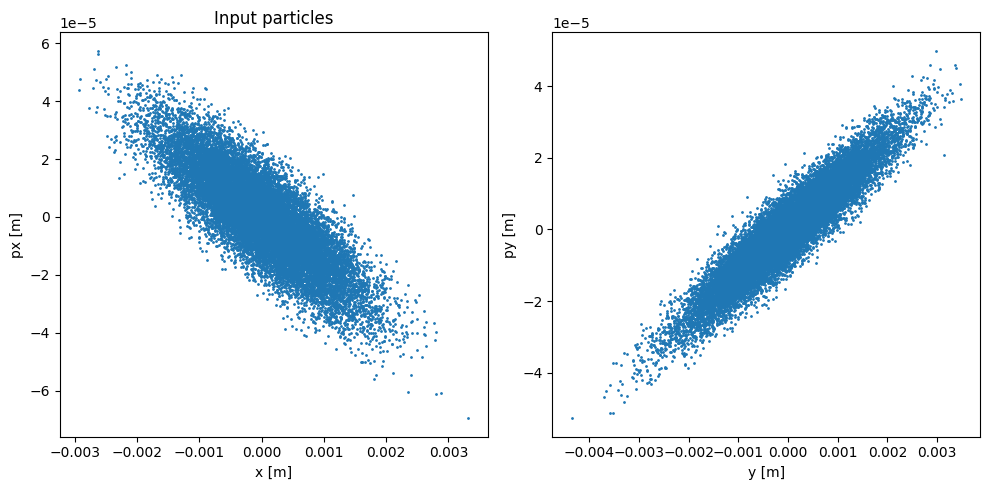

In [3]:
x_input = df_input['x']
y_input = df_input['y']
px_input = df_input['px']
py_input = df_input['py']

# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1)
ax[0].set_xlabel('x [m]')
ax[0].set_ylabel('px [m]')
ax[0].set_title('Input particles')
ax[1].scatter(y_input, py_input, s=1)
ax[1].set_xlabel('y [m]')
ax[1].set_ylabel('py [m]')
plt.tight_layout()
plt.show()

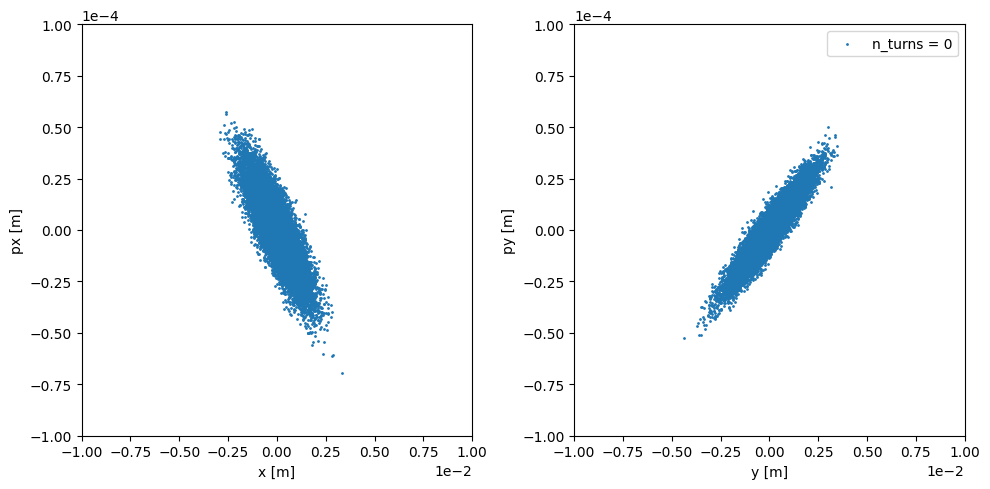

In [4]:
# Plot output particles (two subplots for x and y) at each turn from df
for index, row in df.iterrows():
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # Plot x against px
    ax[0].scatter(row['particles_x'], row['particles_px'], label=f'n_turns = {row["n_turns"]}', s = 1)
    ax[0].set_xlabel('x [m]')
    ax[0].set_ylabel('px [m]')
    # Plot y against py
    ax[1].scatter(row['particles_y'], row['particles_py'], label=f'n_turns = {row["n_turns"]}', s = 1 )
    ax[1].set_xlabel('y [m]')
    ax[1].set_ylabel('py [m]')
    ax[0].set_xlim(-0.01, 0.01)
    ax[0].set_ylim(-0.0001, 0.0001)
    ax[1].set_xlim(-0.01, 0.01)
    ax[1].set_ylim(-0.0001, 0.0001)
    # Change ticks to scientific notation
    ax[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    plt.tight_layout()
    plt.legend()
    plt.show()
    break
    





20000
20000


/tmp/ipykernel_23249/804457836.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


19998
19948
19844
19740
19661
19606
19558
19520
19484
19457
19433
19409
19392
19383
19373
19361
19356
19347
19342
19339
19339
19333
19333
19332
19331
19311
19244
19202
19162
19129
19100
19079
19057
19033
19012
18993
18973
18954
18929
18919
18898
18880
18856
18833
18808
18786
18755
18732
18709
18684
18664
18643
18612
18586
18556
18531
18501
18470
18446
18425
18406
18379
18359
18330
18297
18264
18243
18222
18193
18161
18118
18093
18070
18052
18023
18000
17973
17946
17926
17900
17869
17845
17822
17787
17752
17734
17707
17685
17660
17642
17620
17598
17574
17553
17520
17493
17466
17443
17424
17404
17388
17368
17349
17327
17303
17271
17256
17240
17222
17201
17177
17158
17133
17116
17100
17081
17063
17042
17020
16996
16975
16956
16937
16916
16897
16872
16844
16826
16806
16785
16762
16746
16727
16699
16675
16662
16644
16626
16606
16595
16573
16553
16536
16519
16501
16477
16456
16444
16430
16410
16395
16382
16365
16340
16327
16314
16303
16287
16272
16255
16237
16224
16207
16193
16177
16162
1614

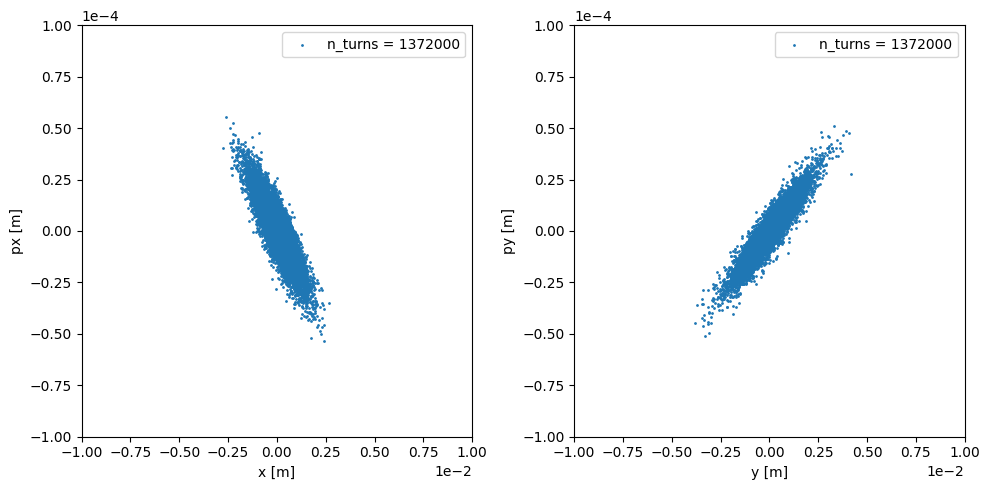

In [5]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assume df is your DataFrame
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(frame):
    ax[0].clear()
    ax[1].clear()
    
    row = df.iloc[frame]

    print(len(row['particles_x']))

    ax[0].scatter(row['particles_x'], row['particles_px'], label=f'n_turns = {row["n_turns"]}', s=1)
    ax[0].set_xlabel('x [m]')
    ax[0].set_ylabel('px [m]')

    ax[1].scatter(row['particles_y'], row['particles_py'], label=f'n_turns = {row["n_turns"]}', s=1)
    ax[1].set_xlabel('y [m]')
    ax[1].set_ylabel('py [m]')

    ax[0].set_xlim(-0.01, 0.01)
    ax[0].set_ylim(-0.0001, 0.0001)
    ax[1].set_xlim(-0.01, 0.01)
    ax[1].set_ylim(-0.0001, 0.0001)

    ax[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

    # Position legend at top right
    ax[0].legend( loc='upper right')
    ax[1].legend( loc='upper right')

    plt.tight_layout()

# Assuming you have df as your DataFrame
animation = FuncAnimation(fig, update, frames=len(df), interval=100, repeat=False)

# Save the animation as a GIF using PillowWriter
animation.save('animation.gif', writer='pillow', fps=1)

plt.show()


In [6]:
df

,particles_x,particles_px,particles_y,particles_py,emittance_x,emittance_y,octupoles,n_turns
0,"[-0.0006300409055838149, 0.0009814116182202532...","[2.5151405675485726e-06, -1.3556786372187228e-...","[-0.0015772294071597405, -0.000762564862266740...","[-1.8245585718646065e-05, -1.4619368247036766e...",6.794590e-09,4.573924e-09,0.000000,0
1,"[2.5624585193836145e-05, 0.0007236148122539714...","[-8.718457964223642e-06, -1.218779922676629e-0...","[0.0016608428804761807, 0.0014047744658013553,...","[2.1065484275852522e-05, 1.7329879606166868e-0...",6.971361e-09,5.647457e-09,0.000000,1000
2,"[0.00023487378588182828, 0.0001128346907018669...","[-6.173074459927323e-07, -3.6299746770659355e-...","[-6.061773248864702e-05, -0.000648976483832753...","[7.290122174113224e-06, -1.9942583248930985e-0...",8.119657e-09,9.011663e-09,0.000000,2000
3,"[-0.00031117493285498087, -0.00029245712215035...","[1.284030201305567e-05, 5.630114400484891e-06,...","[0.00021151473883624562, -0.000564333436802344...","[1.0105327356063637e-05, -1.2386823197562486e-...",8.931410e-09,1.110856e-08,0.000000,3000
4,"[-0.0006834963961278564, -0.000596237262786617...","[5.959050629736054e-06, 1.689149370220709e-05,...","[-0.0015944102413288051, 0.0013054617221662176...","[-2.0642537934116895e-05, 1.668872591836429e-0...",8.434808e-09,9.867317e-09,0.000000,4000
...,...,...,...,...,...,...,...,...
1368,"[-0.00023983380826314256, 0.000265841384753012...","[5.1720679769719465e-06, 3.2249162555832872e-0...","[8.384711606649702e-05, -0.0009064063183680293...","[6.942981447639183e-06, -1.831380268469093e-05...",5.020093e-09,4.096670e-09,-102.061050,1368000
1369,"[-0.00022348820944640904, -0.00039787016495816...","[1.6836525658325532e-05, 1.4553836495514138e-0...","[0.0005370764425807955, -0.0016721618074799413...","[1.1393852295995755e-05, -2.336818547269688e-0...",5.106431e-09,4.101469e-09,-102.172206,1369000
1370,"[0.0009759913256646294, 0.0006325659854230828,...","[-1.4167802555098846e-05, -8.42303491428626e-0...","[0.0005144704828485524, 0.00108942196725188, 0...","[1.1573866651559542e-05, 2.024232987514204e-05...",5.046601e-09,4.102746e-09,-102.283362,1370000
1371,"[-0.000628312045422379, 0.0006857154696711219,...","[1.7035320753445955e-05, -6.517747351464907e-0...","[0.000497163794197226, 0.0005632550182239135, ...","[1.142147187405683e-05, 1.533567396195876e-05,...",5.030673e-09,4.101517e-09,-102.394518,1371000


In [7]:
particles_x = df.iloc[0]['ll_particles_x']
particles_px = df.iloc[0]['ll_particles_px']
particles_y = df.iloc[0]['ll_particles_y']
particles_py = df.iloc[0]['ll_particles_py']

plt.scatter(particles_x, particles_px, s=0.1)
plt.xlabel('x [m]')
plt.ylabel('px [rad]')
plt.show()

KeyError: 'll_particles_x'

In [ ]:
particles_x

array([0.00147593, 0.00147593, 0.00147593, ..., 0.00147593, 0.00147593,
       0.00147593])

In [ ]:
len(particles_px)

20000

In [ ]:
particles_y

array([0.00130697, 0.00130697, 0.00130697, ..., 0.00130697, 0.00130697,
       0.00130697])

In [ ]:
particles_py

array([2.11356946e-05, 2.11356946e-05, 2.11356946e-05, ...,
       2.11356946e-05, 2.11356946e-05, 2.11356946e-05])

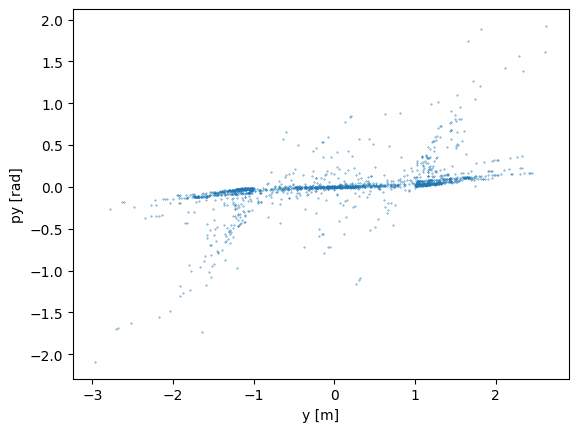

In [ ]:
y = df.y
py = df.py

plt.scatter(y, py, s=0.1)
plt.xlabel('y [m]')
plt.ylabel('py [rad]')
plt.show()


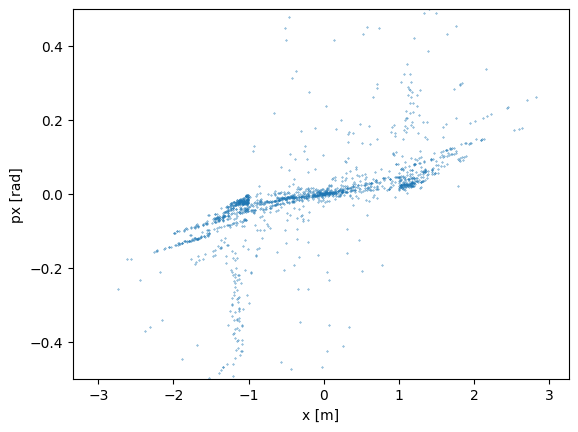

In [ ]:
x = df.x
px = df.px

plt.scatter(x, px, s=0.1)
plt.xlabel('x [m]')
plt.ylabel('px [rad]')
plt.ylim(-0.5, 0.5)
plt.show()